<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Fri Feb 20 06:39:46 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.10.0+cu128


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Underfitting can be prevented from increasing the amount of data, adding more hidden units, or increasing the model layers.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
# 1. Get data
# Import necessary libraries
import requests
import zipfile
from pathlib import Path

# Define image directory
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# Initalize image directory
if image_path.is_dir():
  print(f'{image_path} already exists, skipping download.')
else:
  # Setup image directory if not present
  print(f'Downloading {image_path}')
  image_path.mkdir(parents=True, exist_ok=True)

  # Download image file into image directory from GitHub
  with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    print(f'Downloading image files into {image_path} from GitHub')
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

  with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_file:
    print(f'Unzipping image files')
    zip_file.extractall(image_path)

Unzipping image files


In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [ ]:
# Setup train and testing paths
train_path = image_path / 'train'
test_path = image_path / 'test'

Image class: pizza


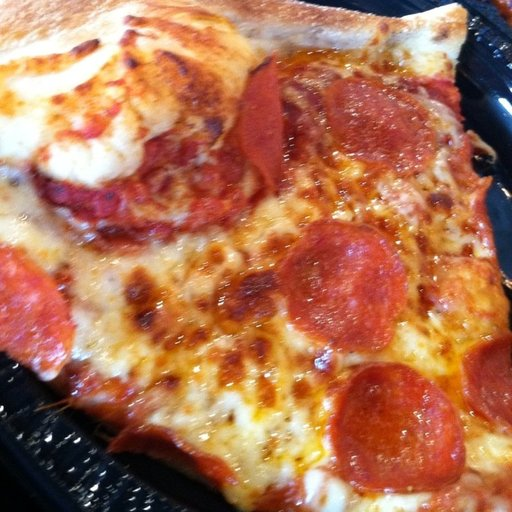

In [ ]:
# Visualize an image
import random
from PIL import Image

image_path_list = list(image_path.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)

random_image = Image.open(random_image_path)

print(f'Image class: {random_image_path.parent.name}')
random_image

Text(0.5, 1.0, 'Image class: pizza')

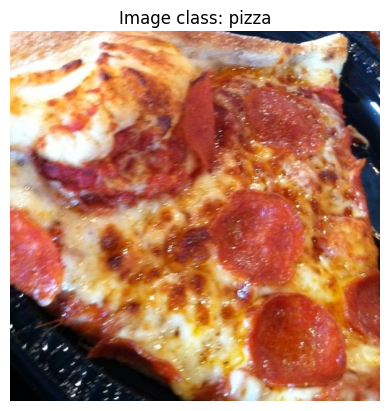

In [ ]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

random_image = np.asarray(random_image)
plt.imshow(random_image)
plt.axis(False)
plt.title(f'Image class: {random_image_path.parent.stem}')

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

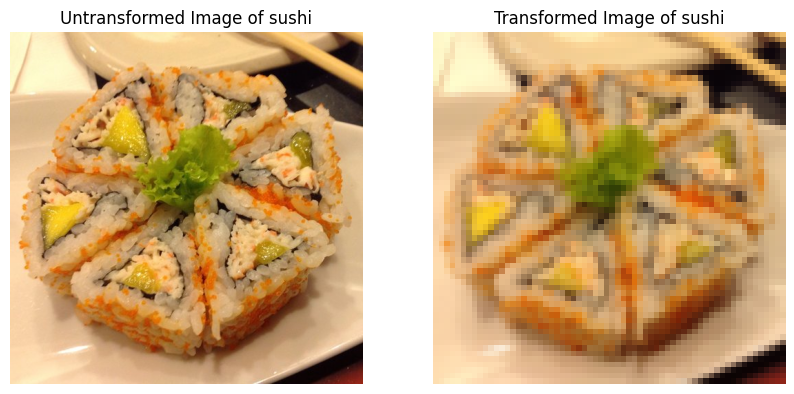

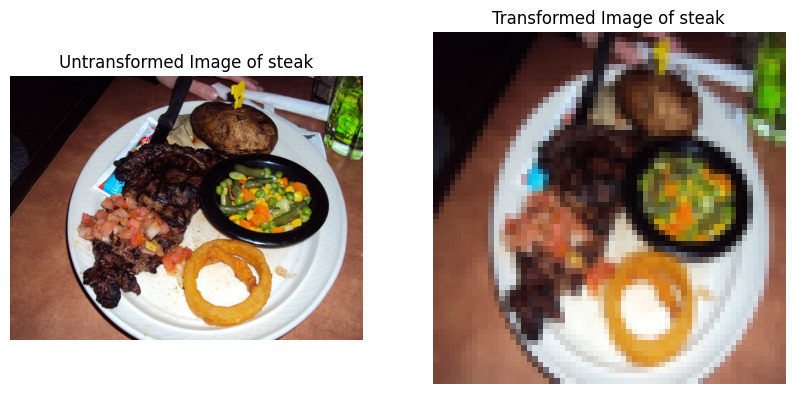

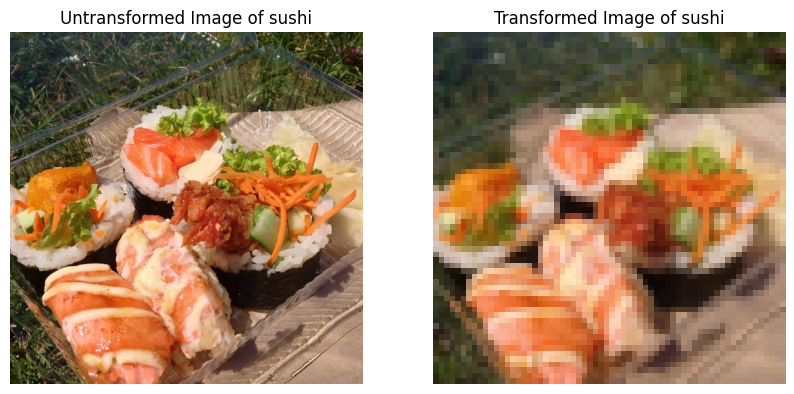

In [ ]:
# Write a function to plot transformed images
def plot_transformed_images(image_path,
                            transform: transforms,
                            number_of_random: int):
  random_image_paths = random.sample(image_path, k=number_of_random)
  for random_image in random_image_paths:
    # Plot untransformed image
    original_image = Image.open(random_image)

    # Transform image
    transformed_image = transform(original_image)

    # Plot untransformed image
    figure = plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis(False)
    plt.title(f'Untransformed Image of {random_image.parent.stem}')

    # Plot transformed image
    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image.permute(1, 2, 0))
    plt.axis(False)
    plt.title(f'Transformed Image of {random_image.parent.stem}')

# Plot transformed images
plot_transformed_images(image_path=image_path_list, transform=test_transform, number_of_random=3)

### Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(
    root=train_path,
    transform=train_transform,
)

test_data = datasets.ImageFolder(
    root=test_path,
    transform=test_transform
)

# Print information about the training and testing dataset
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of each dataset
print(f'Length of training dataset: {len(train_data)}')
print(f'Length of testing dataset: {len(test_data)}')

Length of training dataset: 225
Length of testing dataset: 75


In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
import os

# Define hyperparameters
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dc604fd88f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dc605151a90>)

In [ ]:
# How many batches of images are in our data loaders?
print(f'There are {len(next(iter(train_dataloader))[1])} images for each batch in the training dataloader.')
print(next(iter(train_dataloader))[0].shape)
print(f'There are {len(next(iter(test_dataloader))[1])} images for each batch in the testing dataloader.')

There are 32 images for each batch in the training dataloader.
torch.Size([32, 3, 64, 64])
There are 32 images for each batch in the testing dataloader.


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [ ]:
import torch
from torch import nn

class FoodClassifier(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_layer3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,
                  out_features=output_shape),
    )

  def forward(self, x):
    return self.classifier(self.conv_layer3(self.conv_layer2(self.conv_layer1(x))))

model_0 = FoodClassifier(input_shape=3, hidden_units=40, output_shape=len(class_names)).to(device)

## 4. Create training and testing functions for `model_0`.

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch_size, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    train_logits = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(train_logits, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    train_labels = torch.softmax(train_logits, dim=1).argmax(dim=1)
    acc = (train_labels == y).sum().item()/len(train_labels)
    train_acc += acc

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch_size, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_logits, y)
      test_loss += loss

      # Calculate and accumulate accuracy
      test_labels = torch.softmax(test_logits, dim=1).argmax(dim=1)
      acc = (test_labels == y).sum().item()/len(test_labels)
      test_acc += acc

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [ ]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

train(model=model_0,
      train_dataloader=train_dataloader,
      test_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=50)

end_time = timer()

# Calculate total time
print(f'Total time taken: {end_time - start_time:.3f} seconds')

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1026 | train_acc: 0.2500 | test_loss: 1.0997 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0911 | train_acc: 0.4258 | test_loss: 1.1123 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0849 | train_acc: 0.4258 | test_loss: 1.1185 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.0891 | train_acc: 0.3047 | test_loss: 1.1219 | test_acc: 0.2917
Epoch: 5 | train_loss: 1.0030 | train_acc: 0.4492 | test_loss: 1.3233 | test_acc: 0.3220
Epoch: 6 | train_loss: 1.0172 | train_acc: 0.4648 | test_loss: 1.0925 | test_acc: 0.3627
Epoch: 7 | train_loss: 0.8337 | train_acc: 0.6055 | test_loss: 1.0871 | test_acc: 0.4441
Epoch: 8 | train_loss: 0.8139 | train_acc: 0.6367 | test_loss: 1.5654 | test_acc: 0.3636
Epoch: 9 | train_loss: 0.9954 | train_acc: 0.6367 | test_loss: 1.0995 | test_acc: 0.4536
Epoch: 10 | train_loss: 0.9364 | train_acc: 0.4297 | test_loss: 0.9662 | test_acc: 0.6042
Epoch: 11 | train_loss: 0.8718 | train_acc: 0.6367 | test_loss: 0.9841 | test_acc: 0.4640
Epoch: 12 | train_l

## 6. Repeat the same procedure but with the 20% pizza, steak, sushi dataset

In [ ]:
import torch
from pathlib import Path
import requests
import zipfile

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Setup data path and check for initialization
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi_20_percent'

if image_path.is_dir():
  print(f'{image_path} already exists, skipping download...')
else:
  # Create data and image path
  print(f'Creating {image_path}')
  image_path.mkdir(parents=True, exist_ok=True)

  # Download image data from the internet
  with open(data_path / 'pizza_steak_sushi_20_percent.zip', mode='wb') as f:
    print('Downloading image data from GitHub')
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip')
    f.write(request.content)

  # Unzip file
  with zipfile.ZipFile(data_path / 'pizza_steak_sushi_20_percent.zip', mode='r') as zip:
    print(f'Unzipping image data')
    zip.extractall(image_path)

Creating data/pizza_steak_sushi_20_percent
Unzipping image data


In [ ]:
# Train and test path
train_path = image_path / 'train'
test_path = image_path / 'test'

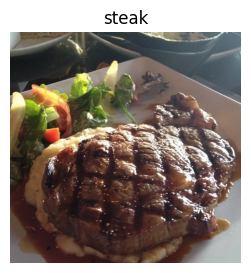

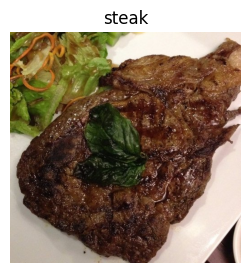

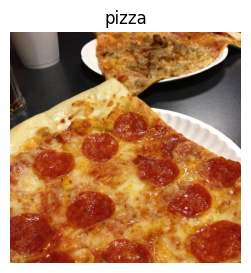

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Access all the images within the data folder
image_list = list(image_path.glob('*/*/*.jpg'))

# Define a function to visualize a set number of images
def plot_images(image_list: list,
                num_images: int):
  for num in range(num_images):
    plt.figure(figsize=(5, 3))
    random_image = image_list[random.randint(1, len(image_list))]
    random_image_class = random_image.parent.stem
    random_image = Image.open(random_image)
    plt.imshow(random_image)
    plt.axis(False)
    plt.title(random_image_class)

plot_images(image_list, num_images=3)

In [ ]:
# Define training transforms
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Define testing transforms
test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

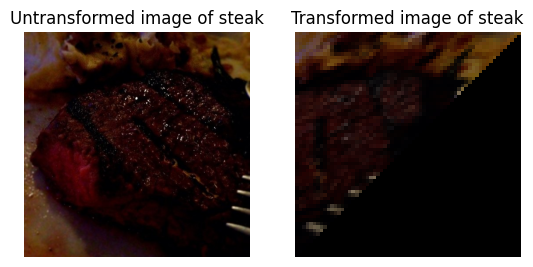

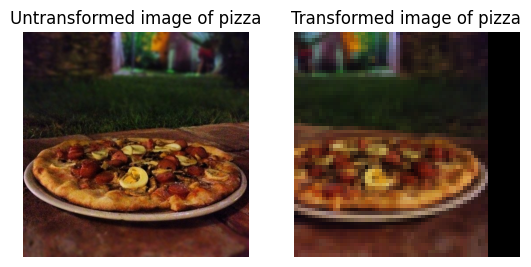

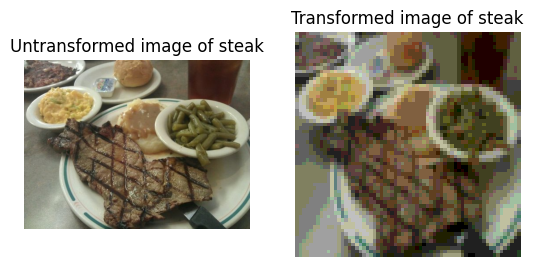

In [ ]:
# Define a function to plot untransformed and transformed images
import torchvision

def plot_transformed_images(image_list: list,
                            num_images: list,
                            transform: transforms.Compose):
  for images in range(num_images):
    fig, ax = plt.subplots(1, 2)
    # Select a random image
    random_image = image_list[random.randint(1, len(image_list))]

    # Obtain random image class
    random_image_class = random_image.parent.stem

    # Open selected random image
    random_image = Image.open(random_image)

    # Plot untransformed image
    ax[0].imshow(random_image)
    ax[0].axis(False)
    ax[0].set_title(f'Untransformed image of {random_image_class}')

    # Transform image
    transformed_random_image = transform(random_image)

    # Plot transformed image
    ax[1].imshow(transformed_random_image.permute(1, 2, 0))
    ax[1].axis(False)
    ax[1].set_title(f'Transformed image of {random_image_class}')

plot_transformed_images(image_list=image_list, num_images=3, transform=train_transform)

In [ ]:
# Load Images using ImageFolder
from torchvision import datasets

# Initialize training dataset
train_dataset = datasets.ImageFolder(
    root=train_path,
    transform=train_transform,
    target_transform=None
)

# Initialize testing dataset
test_dataset = datasets.ImageFolder(
    root=test_path,
    transform=test_transform,
)

train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi_20_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
# Check shapes of dataset
img, label = train_dataset[1]
print(f'Shape of image in dataset: {img.shape}')
print(f'Shape of label in dataset: {label}')

Shape of image in dataset: torch.Size([3, 64, 64])
Shape of label in dataset: 0


In [ ]:
# Create DataLoaders using Dataset
from torch.utils.data import DataLoader
import os

# Initialize hyperparameters
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Initialize training dataloader
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

# Initialize testing dataloader
test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dc604f4dd30>,
 <torch.utils.data.dataloader.DataLoader at 0x7dc6050c4200>)

In [ ]:
# Check shapes of dataloader
img, label = next(iter(train_dataloader))
print(f'Shape of image in dataloader: {img.shape}')
print(f'Shape of label in dataloader: {label.shape}')

Shape of image in dataloader: torch.Size([32, 3, 64, 64])
Shape of label in dataloader: torch.Size([32])


In [ ]:
# Create a neural network model
import torch
from torch import nn

class FoodPredictionModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv_block3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block3(self.conv_block2(self.conv_block1(x))))

# Instantiate the model
model_0 = FoodPredictionModel(input_shape=3, hidden_units=100, output_shape=3).to(device)

In [ ]:
# Try inputting a random tensor into the model
random_tensor = torch.rand(size=(1, 3, 64, 64))
model_0(random_tensor.to(device))

tensor([[-0.0017,  0.0228,  0.0049]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
# Define optimizer and loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [ ]:
# Define training loop
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
  # Put model in training mode
  model.train()

  # Initialize total loss and accuracy
  train_loss = 0
  train_acc = 0

  for batch, (X, y) in enumerate(dataloader):
    ### Training
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    train_logits = model(X)

    # Calculate the loss
    loss = loss_fn(train_logits, y)
    train_loss += loss

    # Calculate the accuracy
    train_labels = torch.softmax(train_logits, dim=1).argmax(dim=1)
    train_acc += (train_labels == y).sum().item()/len(train_labels)

    # Zero the gradients
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Calculate final loss and accuracy of batch
  train_loss = train_loss / len(train_dataloader)
  train_acc = train_acc / len(train_dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # Put model in evaluation mode
  model.eval()

  # Initialize testing accuracy and loss
  test_acc = 0
  test_loss = 0

  for batch, (X, y) in enumerate(dataloader):
    ### Testing
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Run the forward pass
    test_logits = model(X)

    # Calculate the loss
    loss = loss_fn(test_logits, y)
    test_loss += loss

    # Calculate the accuracy
    test_labels = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_acc += (test_labels==y).sum().item() / len(test_logits)

  # Calculate final test accuracy and loss
  test_acc = test_acc / len(dataloader)
  test_loss = test_loss / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# Define training loop
epochs = 100

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_step(model=model_0,
                          dataloader=train_dataloader,
                          loss_fn=loss_fn,
                          optimizer=optimizer,
                          device=device)
  test_loss, test_acc = test_step(model=model_0,
                                  dataloader=test_dataloader,
                                  loss_fn=loss_fn,
                                  device=device)
  print(f'Epoch: {epoch} | Train Loss: {train_loss:4f} | Train Acc: {train_acc:.4f}  | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}')


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.101161 | Train Acc: 0.3354  | Test Loss: 1.0979 | Test Acc: 0.3500
Epoch: 1 | Train Loss: 1.092547 | Train Acc: 0.3667  | Test Loss: 1.0780 | Test Acc: 0.3426
Epoch: 2 | Train Loss: 1.064028 | Train Acc: 0.4313  | Test Loss: 1.0028 | Test Acc: 0.4898
Epoch: 3 | Train Loss: 1.051887 | Train Acc: 0.4000  | Test Loss: 0.9824 | Test Acc: 0.5352
Epoch: 4 | Train Loss: 1.010109 | Train Acc: 0.4833  | Test Loss: 1.0186 | Test Acc: 0.5136
Epoch: 5 | Train Loss: 1.004131 | Train Acc: 0.5083  | Test Loss: 0.9639 | Test Acc: 0.5392
Epoch: 6 | Train Loss: 1.079502 | Train Acc: 0.4354  | Test Loss: 0.9611 | Test Acc: 0.6125
Epoch: 7 | Train Loss: 1.001415 | Train Acc: 0.4958  | Test Loss: 0.9228 | Test Acc: 0.5472
Epoch: 8 | Train Loss: 0.956746 | Train Acc: 0.5354  | Test Loss: 0.8759 | Test Acc: 0.6256
Epoch: 9 | Train Loss: 0.952313 | Train Acc: 0.5312  | Test Loss: 0.9186 | Test Acc: 0.5000
Epoch: 10 | Train Loss: 0.929725 | Train Acc: 0.5125  | Test Loss: 0.8895 | Test